In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle
import json

In [4]:
sims_filename = "sims_03.csv"
sims_df = pd.read_csv(sims_filename)
sims_df = sims_df.iloc[:8]
sims_df

,soil_resolution,function,id,filename
0,7x7x7,C_0000_Feldspar_Fill,3000,7x7x7_C_0000_Feldspar_Fill_003000
1,7x7x7,C_0060_Feldspar_Fill,3001,7x7x7_C_0060_Feldspar_Fill_003001
2,7x7x7,C_0120_Feldspar_Fill,3002,7x7x7_C_0120_Feldspar_Fill_003002
3,7x7x7,C_0180_Feldspar_Fill,3003,7x7x7_C_0180_Feldspar_Fill_003003
4,7x7x7,C_0240_Feldspar_Fill,3004,7x7x7_C_0240_Feldspar_Fill_003004
5,7x7x7,C_0300_Feldspar_Fill,3005,7x7x7_C_0300_Feldspar_Fill_003005
6,7x7x7,C_0360_Feldspar_Fill,3006,7x7x7_C_0360_Feldspar_Fill_003006
7,7x7x7,C_0420_Feldspar_Fill,3007,7x7x7_C_0420_Feldspar_Fill_003007


In [17]:
carbon_levels = np.linspace(0, 0.06, 11)
max_carbon = np.max(carbon_levels)
carbon_levels = carbon_levels[:8]

In [18]:
pickle_files = 'specs/'+sims_df['filename']+'.pkl'
soil_resolutions = sims_df['soil_resolution']
res_info_files = 'ResInfo/res_info_'+soil_resolutions+'.json'
res_info_files

0    ResInfo/res_info_7x7x7.json
1    ResInfo/res_info_7x7x7.json
2    ResInfo/res_info_7x7x7.json
3    ResInfo/res_info_7x7x7.json
4    ResInfo/res_info_7x7x7.json
5    ResInfo/res_info_7x7x7.json
6    ResInfo/res_info_7x7x7.json
7    ResInfo/res_info_7x7x7.json
Name: soil_resolution, dtype: object

In [19]:
res_infos = [json.load(open(res_info_file, 'r')) for res_info_file in res_info_files]
detector_tally_idss = [[int(r) for r in res_info['detector_tally_ids']] for res_info in res_infos]
detector_tally_idss[0]

[808, 818, 828, 834, 836, 844, 846]

In [ ]:
tally_t = 1
tally_data = [pickle.load(open(pickle_file, 'rb')) for pickle_file in pickle_files]
tally_binss = [td[0] for td in tally_data]
tally_spetra = [td[1] for td in tally_data]
detector_bins = [bins[tally_t][-2] for bins in tally_binss]
detector_spectra = [spec[tally_t] for spec in tally_spetra]

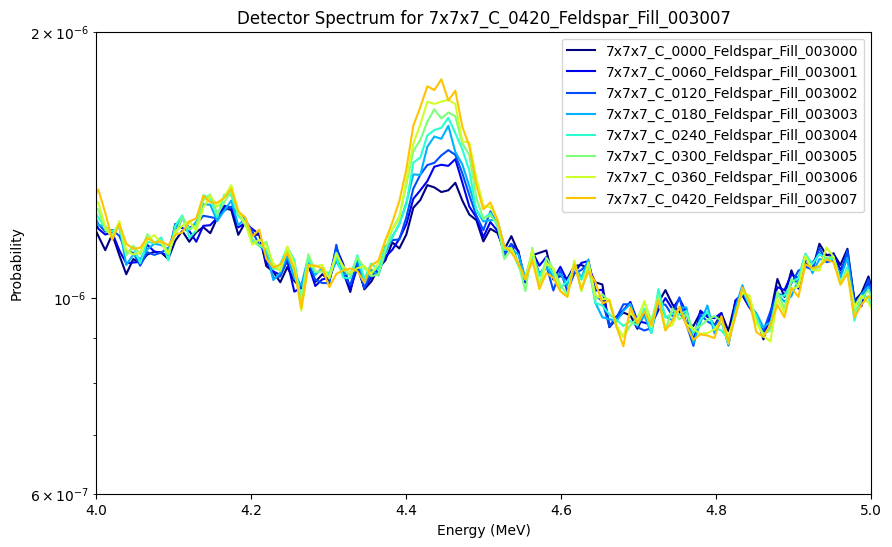

In [22]:
plt.figure(figsize=(10, 6))
for i, detector_spectrum in enumerate(detector_spectra):
    detector_energy_bins = detector_bins[i]
    plt.plot(
        detector_energy_bins, 
        detector_spectrum.flatten(), 
        label=sims_df['filename'][i],
        color=plt.cm.jet(carbon_levels[i]/max_carbon)
        )
plt.xlabel('Energy (MeV)')
plt.ylabel('Probability')
plt.title('Detector Spectrum for ' + sims_df['filename'][i])
plt.legend()
plt.yscale('log')
plt.ylim(6e-7, 2e-6)
plt.xlim(4, 5)
plt.show()